# **Import Libraries**

In [ ]:
import os
import cv2
import keras
import tensorflow as tf 
from tensorflow import keras
from google.colab import drive
from keras.models import Sequential
from sklearn.metrics import ConfusionMatrixDisplay
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense,BatchNormalization,SpatialDropout2D

# **Load Data**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/Shareddrives/Jinishpati Pro Max/soft_com/input/chest_xray')
!pwd

/content/drive/Shareddrives/Jinishpati Pro Max/soft_com/input/chest_xray


# Preprocessing Data

In [ ]:
#Preprocessing the Training set
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/drive/Shareddrives/Jinishpati Pro Max/soft_com/input/chest_xray/train',
        target_size=(128,128),
        batch_size=16 ,
        class_mode='binary')


#Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(
        '/content/drive/Shareddrives/Jinishpati Pro Max/soft_com/input/chest_xray/test',
        target_size=(128,128),
        batch_size=16,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# **CNN**

In [ ]:
#Initialising the CNN
cnn = tf.keras.models.Sequential()

#Layers

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128, 3])) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(SpatialDropout2D(0.1))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.3))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.3))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.3))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.5))

cnn.add(tf.keras.layers.Flatten()) #Step 3 - Flattening
cnn.add(Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu')) #Step 4 - Full Connection
cnn.add(Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu')) #Step 4 - Full Connection
cnn.add(Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #Step 5 - Output Layer


#Compiling the CNN
adam=keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Summary
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 spatial_dropout2d_7 (Spatia  (None, 64, 64, 32)       0         
 lDropout2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                      

In [ ]:
cnn1 = cnn.fit_generator(
        training_set, steps_per_epoch=326, epochs=25, validation_data=test_set, validation_steps=39)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
326/326 [==============================] - 3090s 9s/step - loss: 0.6639 - accuracy: 0.6950 - val_loss: 0.7078 - val_accuracy: 0.6250
Epoch 2/25
326/326 [==============================] - 99s 305ms/step - loss: 0.5913 - accuracy: 0.7258 - val_loss: 0.6398 - val_accuracy: 0.6250
Epoch 3/25
326/326 [==============================] - 101s 309ms/step - loss: 0.5466 - accuracy: 0.7402 - val_loss: 0.5654 - val_accuracy: 0.6250
Epoch 4/25
326/326 [==============================] - 101s 309ms/step - loss: 0.4806 - accuracy: 0.7770 - val_loss: 0.4995 - val_accuracy: 0.7724
Epoch 5/25
326/326 [==============================] - 103s 315ms/step - loss: 0.4012 - accuracy: 0.8227 - val_loss: 0.3975 - val_accuracy: 0.8558
Epoch 6/25
326/326 [==============================] - 101s 309ms/step - loss: 0.3491 - accuracy: 0.8493 - val_loss: 0.3921 - val_accuracy: 0.8750
Epoch 7/25
326/326 [==============================] - 101s 310ms/step - loss: 0.3152 - accuracy: 0.8702 - val_loss: 0.4224 - va

Text(0.5, 1.0, 'Accuracy Evolution')

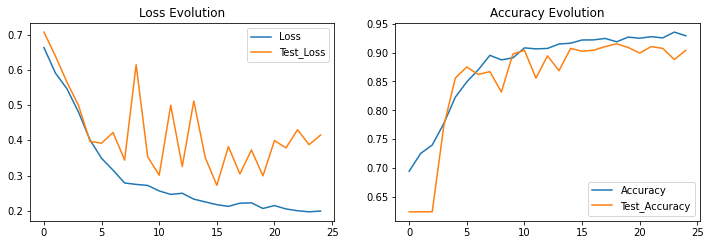

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(cnn1.history['loss'], label='Loss')
plt.plot(cnn1.history['val_loss'], label='Test_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(cnn1.history['accuracy'], label='Accuracy')
plt.plot(cnn1.history['val_accuracy'], label='Test_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')